In [1]:
from shapely.geometry import Point # Use in geospatial environment
import pandas as pd
import geopandas as gpd # Use in geospatial environment
import matplotlib.pyplot as plt
import folium #Use in geospatial environment
from folium import plugins
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

import ipywidgets
import numpy as np
import pandas as pd

In [2]:
zipcodes = gpd.read_file('../data/zipcodes.geojson')
print(zipcodes.crs)
zipcodes.head( )

epsg:4326


,zip,objectid,po_name,shape_stlength,shape_starea,geometry
0,37115,1,MADISON,178783.02488886821,596553400.57885742,"MULTIPOLYGON (((-86.68725 36.31821, -86.68722 ..."
1,37203,33,NASHVILLE,93532.890729543782,120334624.37817383,"MULTIPOLYGON (((-86.78734 36.16688, -86.78711 ..."
2,37204,9,NASHVILLE,93180.292250425613,200664795.51708984,"MULTIPOLYGON (((-86.77914 36.13424, -86.77923 ..."
3,37064,18,FRANKLIN,28995.828320601937,46969608.005737305,"MULTIPOLYGON (((-87.02197 36.01200, -87.02140 ..."
4,37246,57,NASHVILLE,2247.4521491892065,315078.17651367187,"MULTIPOLYGON (((-86.79052 36.15846, -86.79107 ..."


In [3]:
type(zipcodes)

geopandas.geodataframe.GeoDataFrame

In [4]:
zipcodes.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   zip             57 non-null     object  
 1   objectid        57 non-null     object  
 2   po_name         57 non-null     object  
 3   shape_stlength  57 non-null     object  
 4   shape_starea    57 non-null     object  
 5   geometry        57 non-null     geometry
dtypes: geometry(1), object(5)
memory usage: 2.8+ KB


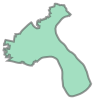

In [5]:
zipcodes.loc[0,'geometry']

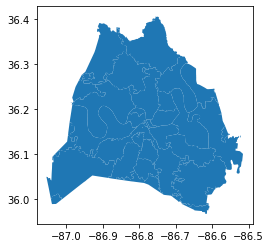

In [6]:
zipcodes.plot();

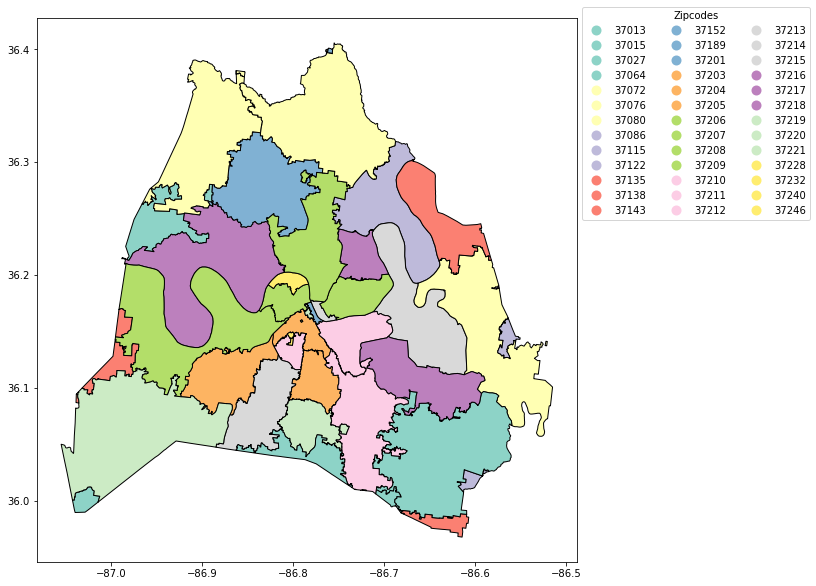

In [7]:
#geopandas handles legend styling if you pass a dict of keywords

leg_kwds = {'title': 'Zipcodes', 'loc': 'upper left', 
            'bbox_to_anchor': (1, 1.03), 'ncol': 3}

zipcodes.plot(column = 'zip', figsize=(10, 10),
              edgecolor = 'black',
              legend = True, legend_kwds = leg_kwds, 
              cmap = 'Set3')
plt.show()

In [8]:
julyt_pkl = pd.read_pickle('../data/july_trips.pkl')
print(julyt_pkl.shape)
julyt_pkl.head()

(134926, 10)


,pubTimeStamp,tripRecordNum,tripRoute,sumdID,tripDuration,tripDistance,startLatitude,endLatitude,startLongitude,endLongitude
0,2019-07-01 00:02:52.213,BRD5179,"[[36.177438,-86.751861],[36.177425,-86.751987]...",PoweredZSHKJ,2.0,0.0,36.1775,36.1778,-86.7516,-86.7514
1,2019-07-01 00:02:52.213,BRD5177,"[[36.162718,-86.771102],[36.162718,-86.771102]]",Powered22JF6,0.0,0.0,36.1627,36.1627,-86.7711,-86.7711
2,2019-07-01 00:02:52.213,BRD5176,"[[36.162734,-86.77122],[36.162706,-86.771325],...",Powered22JF6,1.0,0.0,36.1627,36.1627,-86.7713,-86.7713
3,2019-07-01 00:02:52.213,BRD5178,"[[36.152499,-86.798708]]",PoweredIB2CC,1.0,0.0,36.1525,36.1525,-86.7988,-86.7988
4,2019-07-01 00:02:52.213,BRD5180,"[[36.157523,-86.775794]]",PoweredW4G7R,2.0,0.0,36.1578,36.1575,-86.7760,-86.7758


In [9]:
julyt_pkl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134926 entries, 0 to 134925
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   pubTimeStamp    134926 non-null  datetime64[ns]
 1   tripRecordNum   134926 non-null  object        
 2   tripRoute       134926 non-null  object        
 3   sumdID          134926 non-null  object        
 4   tripDuration    134926 non-null  float64       
 5   tripDistance    134926 non-null  float64       
 6   startLatitude   134926 non-null  float64       
 7   endLatitude     134926 non-null  float64       
 8   startLongitude  134926 non-null  float64       
 9   endLongitude    134926 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(3)
memory usage: 10.3+ MB


In [10]:
julyt_pkl.loc[0].startLatitude

36.1775

In [11]:
julyt_pkl['geometry'] = julyt_pkl.apply(lambda x: Point((x.startLongitude, x.startLatitude)), 
                                        axis=1)
julyt_pkl.head(3)

,pubTimeStamp,tripRecordNum,tripRoute,sumdID,tripDuration,tripDistance,startLatitude,endLatitude,startLongitude,endLongitude,geometry
0,2019-07-01 00:02:52.213,BRD5179,"[[36.177438,-86.751861],[36.177425,-86.751987]...",PoweredZSHKJ,2.0,0.0,36.1775,36.1778,-86.7516,-86.7514,POINT (-86.7516 36.1775)
1,2019-07-01 00:02:52.213,BRD5177,"[[36.162718,-86.771102],[36.162718,-86.771102]]",Powered22JF6,0.0,0.0,36.1627,36.1627,-86.7711,-86.7711,POINT (-86.7711 36.1627)
2,2019-07-01 00:02:52.213,BRD5176,"[[36.162734,-86.77122],[36.162706,-86.771325],...",Powered22JF6,1.0,0.0,36.1627,36.1627,-86.7713,-86.7713,POINT (-86.7713 36.1627)


In [12]:
zipcodes.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [13]:
julyt_scooter_geo = gpd.GeoDataFrame(julyt_pkl, 
                           crs = zipcodes.crs, 
                           geometry = julyt_pkl['geometry'])

In [14]:
type(julyt_pkl)

pandas.core.frame.DataFrame

In [15]:
type(julyt_scooter_geo)

geopandas.geodataframe.GeoDataFrame

In [16]:
julyt_scooter_geo.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 134926 entries, 0 to 134925
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   pubTimeStamp    134926 non-null  datetime64[ns]
 1   tripRecordNum   134926 non-null  object        
 2   tripRoute       134926 non-null  object        
 3   sumdID          134926 non-null  object        
 4   tripDuration    134926 non-null  float64       
 5   tripDistance    134926 non-null  float64       
 6   startLatitude   134926 non-null  float64       
 7   endLatitude     134926 non-null  float64       
 8   startLongitude  134926 non-null  float64       
 9   endLongitude    134926 non-null  float64       
 10  geometry        134926 non-null  geometry      
dtypes: datetime64[ns](1), float64(6), geometry(1), object(3)
memory usage: 11.3+ MB


In [17]:
zipcodes = zipcodes[['zip', 'po_name', 'geometry']]

In [18]:
stops_by_zip = gpd.sjoin(julyt_scooter_geo, zipcodes, op = 'within')

In [19]:
stops_by_zip.head(5)

,pubTimeStamp,tripRecordNum,tripRoute,sumdID,tripDuration,tripDistance,startLatitude,endLatitude,startLongitude,endLongitude,geometry,index_right,zip,po_name
0,2019-07-01 00:02:52.213,BRD5179,"[[36.177438,-86.751861],[36.177425,-86.751987]...",PoweredZSHKJ,2.00000,0.00000,36.1775,36.17780,-86.75160,-86.75140,POINT (-86.75160 36.17750),46,37206,NASHVILLE
26,2019-07-01 00:12:52.437,BRD5282,"[[36.176038,-86.76081],[36.175959,-86.760837],...",PoweredU1QWL,9.00000,0.00000,36.1760,36.17590,-86.76090,-86.76090,POINT (-86.76090 36.17600),46,37206,NASHVILLE
118,2019-07-01 00:32:53.757,BRD5463,"[[36.178056,-86.755718],[36.177984,-86.75558],...",Powered3HZZV,4.00000,0.00000,36.1780,36.17810,-86.75580,-86.75580,POINT (-86.75580 36.17800),46,37206,NASHVILLE
170,2019-07-01 00:43:26.033,LFT62,"[[36.1774,-86.74989],[36.17743,-86.74994],[36....",Powered536423,6.95655,1633.85832,36.1774,36.17404,-86.74989,-86.75187,POINT (-86.74989 36.17740),46,37206,NASHVILLE
211,2019-07-01 00:52:54.660,BRD5629,"[[36.179298,-86.746625],[36.177447,-86.745683]]",PoweredTLSDM,10.00000,0.00000,36.1792,36.17920,-86.74670,-86.74680,POINT (-86.74670 36.17920),46,37206,NASHVILLE


In [20]:
stops_by_zip['zip'].value_counts()

37203    65089
37201    26237
37219    11828
37212     6572
37208     5719
37213     4567
37206     4275
37204     3692
37210     3237
37240     1680
37207      588
37232      571
37209      524
37228       92
37216       62
37205       49
37246       46
37215       34
37211       30
37013       14
37217        5
37218        3
37221        3
37214        3
37220        2
37115        2
Name: zip, dtype: int64

In [21]:
stops_in_37207 = stops_by_zip.loc[stops_by_zip['zip'] == '37207']
stops_in_37207.shape

(588, 14)

In [22]:
polygon37207 = zipcodes.loc[zipcodes['zip'] == '37207']
polygon37207.shape

(2, 3)

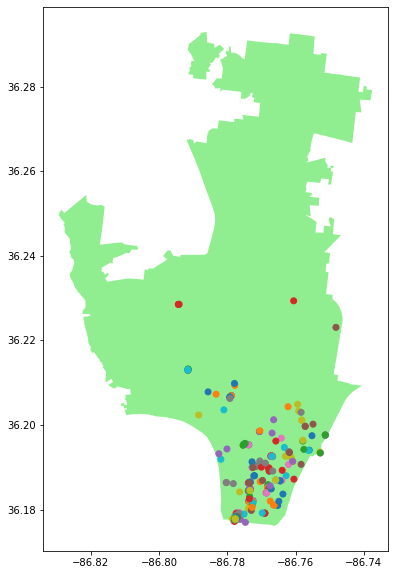

In [23]:
#fig, ax = matplotlib.subplots()
ax = polygon37207.plot(figsize = (8, 10), color = 'lightgreen')
stops_in_37207.plot( ax = ax, column = 'sumdID');
plt.show();

In [24]:
polygon37207.geometry.centroid

C:\Users\Joselit\AppData\Local\Temp/ipykernel_12444/3792774199.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  polygon37207.geometry.centroid


49    POINT (-86.77677 36.23245)
54    POINT (-86.78726 36.28724)
dtype: geometry

In [25]:
#find the center of the larger (more southern) polygon and look at it
center = polygon37207.geometry.centroid[49]
print(center)

POINT (-86.77676762469856 36.23245257407242)


C:\Users\Joselit\AppData\Local\Temp/ipykernel_12444/760013409.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center = polygon37207.geometry.centroid[49]


In [26]:
# reverse the order when constructing the array for folium location
area_center = [center.y, center.x]

# check the order of area_center, the location for our folium map
print(area_center)

[36.23245257407242, -86.77676762469856]


In [27]:
stops_in_37206 = stops_by_zip.loc[stops_by_zip['zip'] == '37206']
stops_in_37206 = stops_in_37206[:800]
stops_in_37206.shape

(800, 14)

In [28]:
polygon37206 = zipcodes.loc[zipcodes['zip'] == '37206']
polygon37206.shape

(1, 3)

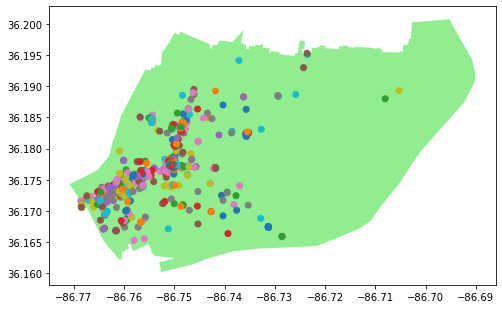

In [29]:
#fig, ax = matplotlib.subplots()
ax = polygon37206.plot(figsize = (8, 10), color = 'lightgreen')
stops_in_37206.plot( ax = ax, column = 'sumdID');
plt.show();

In [30]:
stops_in_37213 = stops_by_zip.loc[stops_by_zip['zip'] == '37213']
stops_in_37213 = stops_in_37213[:800]
stops_in_37213.shape

(800, 14)

In [31]:
polygon37213 = zipcodes.loc[zipcodes['zip'] == '37213']
polygon37213.shape

(1, 3)

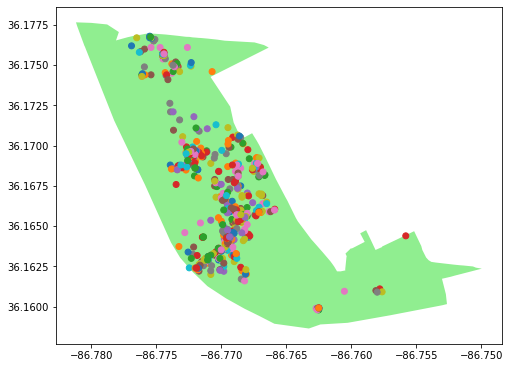

In [32]:
#fig, ax = matplotlib.subplots()
ax = polygon37213.plot(figsize = (8, 10), color = 'lightgreen')
stops_in_37213.plot( ax = ax, column = 'sumdID');
plt.show();

In [33]:
stops_in_37219 = stops_by_zip.loc[stops_by_zip['zip'] == '37219']
stops_in_37219 = stops_in_37219[:800]
stops_in_37219.shape

(800, 14)

In [34]:
polygon37219 = zipcodes.loc[zipcodes['zip'] == '37219']
polygon37219.shape

(1, 3)

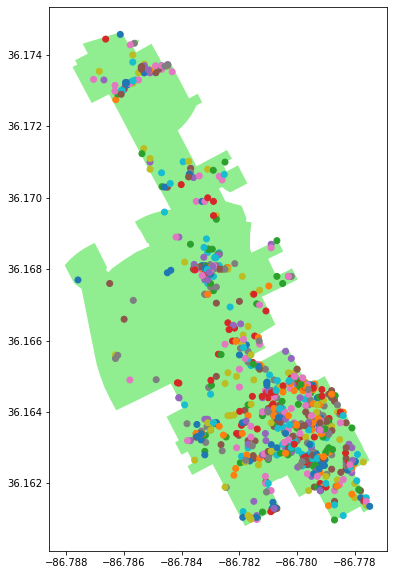

In [35]:
#fig, ax = matplotlib.subplots()
ax = polygon37219.plot(figsize = (8, 10), color = 'lightgreen')
stops_in_37219.plot( ax = ax, column = 'sumdID');
plt.show();

In [36]:
stops_in_37208 = stops_by_zip.loc[stops_by_zip['zip'] == '37208']
stops_in_37208 = stops_in_37208[:800]
stops_in_37208.shape

(800, 14)

In [37]:
polygon37208 = zipcodes.loc[zipcodes['zip'] == '37208']
polygon37208.shape

(1, 3)

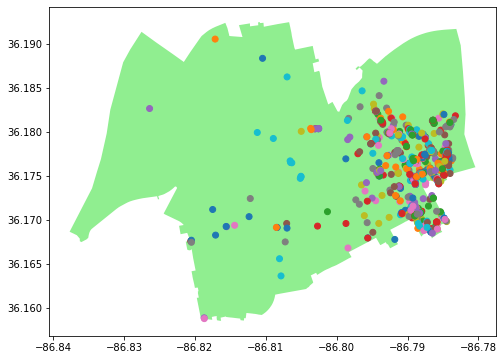

In [38]:
#fig, ax = matplotlib.subplots()
ax = polygon37208.plot(figsize = (8, 10), color = 'lightgreen')
stops_in_37208.plot( ax = ax, column = 'sumdID');
plt.show();

In [39]:
stops_in_37209 = stops_by_zip.loc[stops_by_zip['zip'] == '37209']
stops_in_37209.shape

(524, 14)

In [40]:
polygon37209 = zipcodes.loc[zipcodes['zip'] == '37209']
polygon37209.shape

(1, 3)

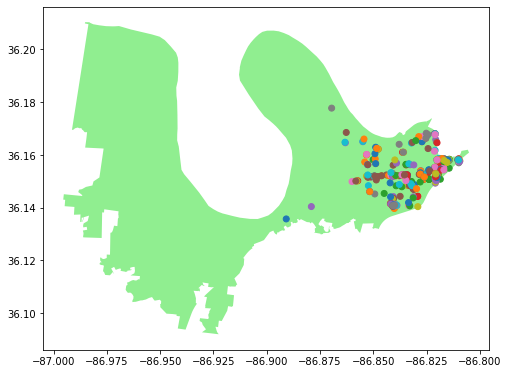

In [41]:
#fig, ax = matplotlib.subplots()
ax = polygon37209.plot(figsize = (8, 10), color = 'lightgreen')
stops_in_37209.plot( ax = ax, column = 'sumdID');
plt.show();

In [42]:
stops_in_37240 = stops_by_zip.loc[stops_by_zip['zip'] == '37240']
stops_in_37240 = stops_in_37240[:800]
stops_in_37240.shape

(800, 14)

In [43]:
polygon37240 = zipcodes.loc[zipcodes['zip'] == '37240']
polygon37240.shape

(1, 3)

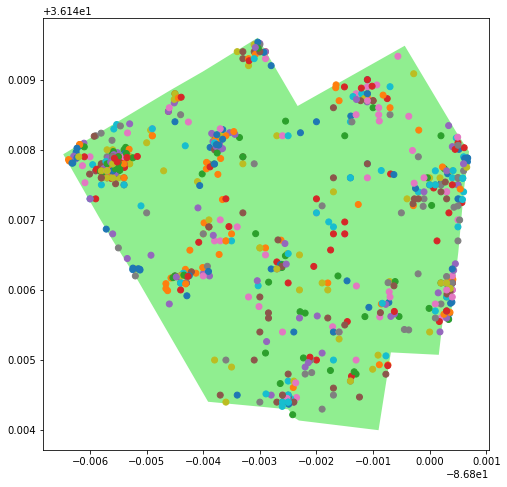

In [44]:
#fig, ax = matplotlib.subplots()
ax = polygon37240.plot(figsize = (8, 10), color = 'lightgreen')
stops_in_37240.plot( ax = ax, column = 'sumdID');
plt.show();

In [45]:
stops_in_37212 = stops_by_zip.loc[stops_by_zip['zip'] == '37212']
stops_in_37212 = stops_in_37212[:800]
stops_in_37212.shape

(800, 14)

In [46]:
polygon37212 = zipcodes.loc[zipcodes['zip'] == '37212']
polygon37212.shape

(1, 3)

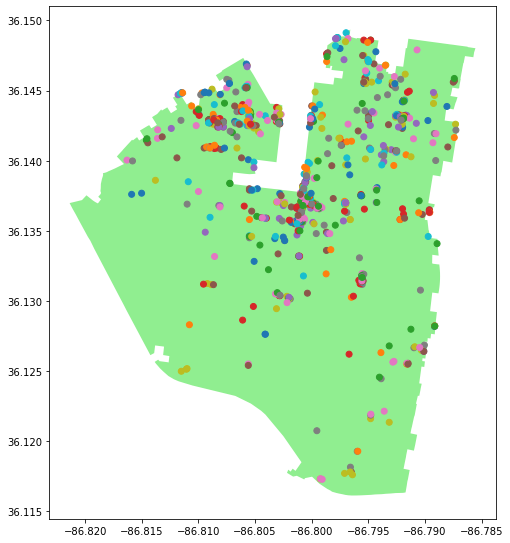

In [47]:
#fig, ax = matplotlib.subplots()
ax = polygon37212.plot(figsize = (8, 10), color = 'lightgreen')
stops_in_37212.plot( ax = ax, column = 'sumdID');
plt.show();

In [48]:
stops_in_37210 = stops_by_zip.loc[stops_by_zip['zip'] == '37210']
stops_in_37210 = stops_in_37210[:800]
stops_in_37210.shape

(800, 14)

In [49]:
polygon37210 = zipcodes.loc[zipcodes['zip'] == '37210']
polygon37210.shape

(1, 3)

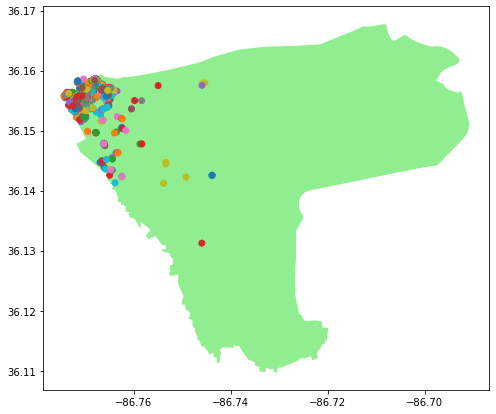

In [50]:
#fig, ax = matplotlib.subplots()
ax = polygon37210.plot(figsize = (8, 10), color = 'lightgreen')
stops_in_37210.plot( ax = ax, column = 'sumdID');
plt.show();

In [51]:
stops_in_37201 = stops_by_zip.loc[stops_by_zip['zip'] == '37201']
stops_in_37201 = stops_in_37201[:800]
stops_in_37201.shape

(800, 14)

In [52]:
polygon37201 = zipcodes.loc[zipcodes['zip'] == '37201']
polygon37201.shape

(1, 3)

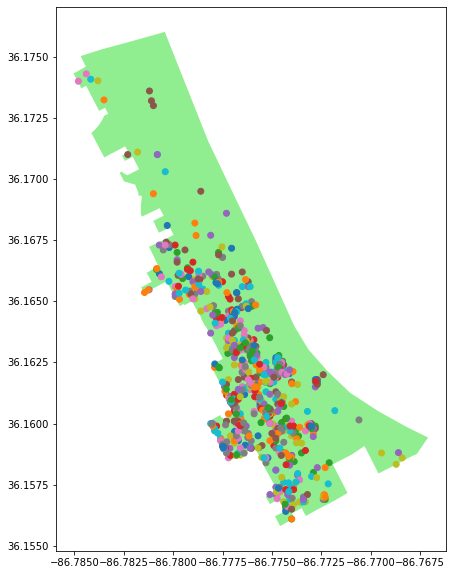

In [53]:
#fig, ax = matplotlib.subplots()
ax = polygon37201.plot(figsize = (8, 10), color = 'lightgreen')
stops_in_37201.plot( ax = ax, column = 'sumdID');
plt.show();

In [54]:
stops_in_37228 = stops_by_zip.loc[stops_by_zip['zip'] == '37228']
stops_in_37228.shape

(92, 14)

In [55]:
polygon37228 = zipcodes.loc[zipcodes['zip'] == '37228']
polygon37228.shape

(1, 3)

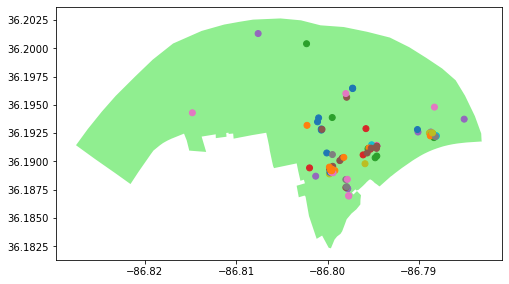

In [56]:
#fig, ax = matplotlib.subplots()
ax = polygon37228.plot(figsize = (8, 10), color = 'lightgreen')
stops_in_37228.plot( ax = ax, column = 'sumdID');
plt.show();

In [57]:
stops_in_37232 = stops_by_zip.loc[stops_by_zip['zip'] == '37232']
stops_in_37232 = stops_in_37232[:800]
stops_in_37232.shape

(571, 14)

In [58]:
polygon37232 = zipcodes.loc[zipcodes['zip'] == '37232']
polygon37232.shape

(1, 3)

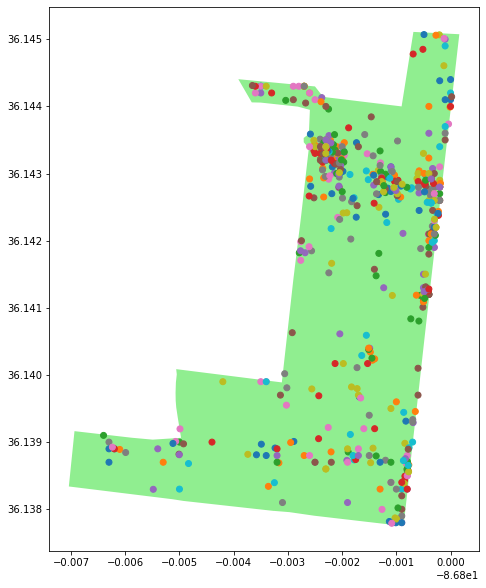

In [59]:
#fig, ax = matplotlib.subplots()
ax = polygon37232.plot(figsize = (8, 10), color = 'lightgreen')
stops_in_37232.plot( ax = ax, column = 'sumdID');
plt.show();

In [60]:
#create our map of Nashville Zip Code 37207 and show it
map_37207 = folium.Map(location =  area_center, zoom_start = 12)
map_37207

In [61]:
i = 0
for row_index, row_values in stops_in_37207.iterrows():
    if i <3: 
        print('index is', row_index)
        print('values are:')
        print(' ')
        print(row_values)
        print('------------------------- ')
        i+=1

index is 17
values are:
 
pubTimeStamp                             2019-07-01 00:12:52.437000
tripRecordNum                                               BRD5284
tripRoute         [[36.17849,-86.777107],[36.178499,-86.77709],[...
sumdID                                                 PoweredIQ2DB
tripDuration                                                   10.0
tripDistance                                                    0.0
startLatitude                                               36.1784
endLatitude                                                 36.1782
startLongitude                                             -86.7772
endLongitude                                               -86.7774
geometry                         POINT (-86.77719999999999 36.1784)
index_right                                                      49
zip                                                           37207
po_name                                                   NASHVILLE
Name: 17, dtype: objec

In [62]:
#draw our zip code area: 37207
map_37207 = folium.Map(location =  area_center, zoom_start = 12)

folium.GeoJson(polygon37207).add_to(map_37207)

#iterate through stops_in_37207 to create locations and markers 
#for each bus stop
#remember for Folium locations, lat is listed first!!

for row_index, row_values in stops_in_37207.iterrows():
    loc = [row_values['startLatitude'], row_values['startLongitude']]
    pop = str(row_values['sumdID'])
    icon=folium.Icon(color="blue",icon="bicycle", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop, icon = icon) 

    marker.add_to(map_37207)
#map_37215.save('../maps/map37215.html')

#display our map
map_37207

In [63]:
folium.Map?

In [75]:
stops_in_37203 = stops_by_zip.loc[stops_by_zip['zip'] == '37203']
stops_in_37203 = stops_in_37203[:800]
stops_in_37203.shape

(800, 14)

In [76]:
polygon37203 = zipcodes.loc[zipcodes['zip'] == '37203']
polygon37203.shape

(1, 3)

In [77]:
stops_in_37215 = stops_by_zip.loc[stops_by_zip['zip'] == '37215']
stops_in_37215.shape

(34, 14)

In [78]:
polygon37215 = zipcodes.loc[zipcodes['zip'] == '37215']
polygon37215.shape

(1, 3)

In [79]:
stops_in_37219 = stops_by_zip.loc[stops_by_zip['zip'] == '37219']
stops_in_37219 = stops_by_zip[:800]
stops_in_37219.shape

(800, 14)

In [80]:
polygon37219 = zipcodes.loc[zipcodes['zip'] == '37219']
polygon37219.shape

(1, 3)

In [81]:
#draw our zip code area: 37215
map_37215 = folium.Map(location =  area_center, zoom_start = 11, control_scale=True)

folium.GeoJson(polygon37215).add_to(map_37215)
folium.GeoJson(polygon37203).add_to(map_37215)
folium.GeoJson(polygon37207).add_to(map_37215)
folium.GeoJson(polygon37206).add_to(map_37215)
folium.GeoJson(polygon37213).add_to(map_37215)
folium.GeoJson(polygon37219).add_to(map_37215)
folium.GeoJson(polygon37208).add_to(map_37215)
folium.GeoJson(polygon37209).add_to(map_37215)
folium.GeoJson(polygon37240).add_to(map_37215)
folium.GeoJson(polygon37212).add_to(map_37215)
folium.GeoJson(polygon37210).add_to(map_37215)
folium.GeoJson(polygon37201).add_to(map_37215)
folium.GeoJson(polygon37228).add_to(map_37215)
folium.GeoJson(polygon37232).add_to(map_37215)

#display our map
map_37215

In [84]:
promise_zones= gpd.read_file('../data/MDHA_Promise_Zones/Export_Output_5.shp')
print(promise_zones.crs)
promise_zones.head(7)

epsg:2274


,OBJECTID,ZONE_ID,SHAPE_STAr,SHAPE_STLe,geometry
0,1,1,1.053728e+08,49364.601403,"POLYGON ((1743366.812 678044.543, 1743367.698 ..."
1,2,2,7.670585e+07,45226.018917,"POLYGON ((1738690.545 661791.347, 1738733.644 ..."
2,3,3,2.985488e+08,75207.067487,"POLYGON ((1759602.544 668309.889, 1759640.155 ..."
3,4,4,2.713638e+08,74348.596054,"POLYGON ((1747799.003 654974.612, 1747821.293 ..."
4,5,5,3.928178e+08,106661.712102,"POLYGON ((1737013.744 692634.639, 1737122.605 ..."
5,6,6,9.535996e+07,59256.923574,"POLYGON ((1716935.654 667534.495, 1716992.481 ..."


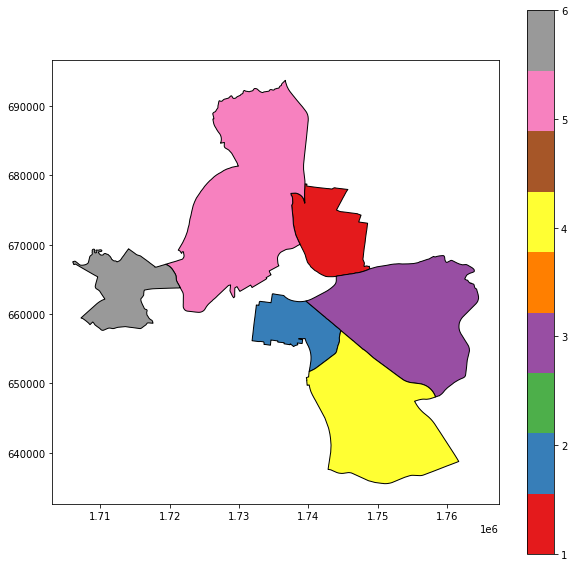

In [86]:
promise_zones.plot(column = 'ZONE_ID', figsize=(10, 10),
              edgecolor = 'black',
              legend = True,
              cmap = 'Set1')
plt.show()

In [89]:
#draw our zip code area: 37215
map_37215 = folium.Map(location =  area_center, zoom_start = 11, control_scale=True)



folium.GeoJson(polygon37215).add_to(map_37215)
folium.GeoJson(polygon37203).add_to(map_37215)
folium.GeoJson(polygon37207).add_to(map_37215)
folium.GeoJson(polygon37206).add_to(map_37215)
folium.GeoJson(polygon37213).add_to(map_37215)
folium.GeoJson(polygon37219).add_to(map_37215)
folium.GeoJson(polygon37208).add_to(map_37215)
folium.GeoJson(polygon37209).add_to(map_37215)
folium.GeoJson(polygon37240).add_to(map_37215)
folium.GeoJson(polygon37212).add_to(map_37215)
folium.GeoJson(polygon37210).add_to(map_37215)
folium.GeoJson(polygon37201).add_to(map_37215)
folium.GeoJson(polygon37228).add_to(map_37215)
folium.GeoJson(polygon37232).add_to(map_37215)



#create a list of locations and pass them to FastMarkerCluster()
locations = stops_in_37215[['startLatitude', 'startLongitude']].values.tolist()
map_37215.add_child(FastMarkerCluster(locations)) #GreenHills

locations = stops_in_37203[['startLatitude', 'startLongitude']].values.tolist()
map_37215.add_child(FastMarkerCluster(locations))#WestEnd, CentennialPark, Broadway, Demonbreum, Fairgrounds,GulchWest

locations = stops_in_37207[['startLatitude', 'startLongitude']].values.tolist()
map_37215.add_child(FastMarkerCluster(locations))#DickersonPike, ClevelandPark

locations = stops_in_37206[['startLatitude', 'startLongitude']].values.tolist()
map_37215.add_child(FastMarkerCluster(locations))#EastNashville

locations = stops_in_37213[['startLatitude', 'startLongitude']].values.tolist()
map_37215.add_child(FastMarkerCluster(locations))#TitansStadium

locations = stops_in_37219[['startLatitude', 'startLongitude']].values.tolist()
map_37215.add_child(FastMarkerCluster(locations))#StateCapitol

locations = stops_in_37208[['startLatitude', 'startLongitude']].values.tolist()
map_37215.add_child(FastMarkerCluster(locations))#NorthNashville, Temple Cementary

locations = stops_in_37209[['startLatitude', 'startLongitude']].values.tolist()
map_37215.add_child(FastMarkerCluster(locations))#TSU, JohnTuneAirport

locations = stops_in_37240[['startLatitude', 'startLongitude']].values.tolist()
map_37215.add_child(FastMarkerCluster(locations)) #Vanderbilt Campus

locations = stops_in_37212[['startLatitude', 'startLongitude']].values.tolist()
map_37215.add_child(FastMarkerCluster(locations))#Belmont

locations = stops_in_37210[['startLatitude', 'startLongitude']].values.tolist()
map_37215.add_child(FastMarkerCluster(locations)) #Trevecca, GulchEast

locations = stops_in_37201[['startLatitude', 'startLongitude']].values.tolist()
map_37215.add_child(FastMarkerCluster(locations))#RiverFront, lowerBroadway, PublicSquare

locations = stops_in_37228[['startLatitude', 'startLongitude']].values.tolist()
map_37215.add_child(FastMarkerCluster(locations)) #MetroCenter, TedRhodesFields

locations = stops_in_37232[['startLatitude', 'startLongitude']].values.tolist()
map_37215.add_child(FastMarkerCluster(locations)) #Vanderbilt Hosp


map_37215.save('../maps/map37215.html')


#display our map
map_37215

In [ ]:


# create latitude, longitude, intensity for heat map
# intensity is population scaled down so heat dots are more readable
new_york_city_latlng = [new_york_city.lat, new_york_city.lng, 8398748/1000]
los_angeles_latlng = [los_angeles.lat, los_angeles.lng, 3990456/1000]
chicago_latlng = [chicago.lat, chicago.lng, 2705994/1000]
houston_latlng = [houston.lat, houston.lng, 2325502/1000]
phoenix_latlng = [phoenix.lat, phoenix.lng, 1660272/1000]
philadelphia_latlng = [philadelphia.lat, philadelphia.lng, 1584138/1000]
san_antonio_latlng = [san_antonio.lat, san_antonio.lng, 1532233/1000]
san_diego_latlng = [san_diego.lat, san_diego.lng, 1425976/1000]
dallas_latlng = [dallas.lat, dallas.lng, 1345047/1000]
san_jose_latlng = [san_jose.lat, san_jose.lng, 1030119/1000]

# create list of cities with latitude, longitude, intensity
large_cities = [new_york_city_latlng, los_angeles_latlng, chicago_latlng, houston_latlng, phoenix_latlng, 
                philadelphia_latlng, san_antonio_latlng, san_diego_latlng, dallas_latlng, san_jose_latlng]

map_heatmap = folium.Map([40, -99], tiles='CartoDB Positron', zoom_start=4)

plugins.HeatMap(large_cities).add_to(map_heatmap)

map_heatmap
    



In [ ]:
#draw our zip code area: 37207
map_37207 = folium.Map(location =  area_center, zoom_start = 12)

folium.GeoJson(polygon37207).add_to(map_37207)
folium.GeoJson(polygon37215).add_to(map_37207)
folium.GeoJson(polygon37203).add_to(map_37207)
folium.GeoJson(polygon37206).add_to(map_37207)
folium.GeoJson(polygon37219).add_to(map_37207)
folium.GeoJson(polygon37203).add_to(map_37207)

#iterate through stops_in_37207 to create locations and markers 
#for each bus stop
#remember for Folium locations, lat is listed first!!

for row_index, row_values in stops_in_37207.iterrows():
    loc = [row_values['startLatitude'], row_values['startLongitude']]
    pop = str(row_values['sumdID'])
    icon=folium.Icon(color="blue",icon="bicycle", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop, icon = icon) 

    marker.add_to(map_37207)
    
for row_index, row_values in stops_in_37215.iterrows():
    loc = [row_values['startLatitude'], row_values['startLongitude']]
    pop = str(row_values['sumdID'])
    icon=folium.Icon(color="blue",icon="bicycle", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop, icon = icon) 

    marker.add_to(map_37207)
    

#map_37215.save('../maps/map37215.html')

#display our map
map_37207

In [65]:
from collections import namedtuple
def get_bearing(p1, p2):
    
    '''
    Returns compass bearing from p1 to p2
    
    Parameters
    p1 : namedtuple with lat lon
    p2 : namedtuple with lat lon
    
    Return
    compass bearing of type float
    
    Notes
    Based on https://gist.github.com/jeromer/2005586
    '''
    
    long_diff = np.radians(p2.lon - p1.lon)
    
    lat1 = np.radians(p1.lat)
    lat2 = np.radians(p2.lat)
    
    x = np.sin(long_diff) * np.cos(lat2)
    y = (np.cos(lat1) * np.sin(lat2) 
        - (np.sin(lat1) * np.cos(lat2) 
        * np.cos(long_diff)))
    bearing = np.degrees(np.arctan2(x, y))
    
    # adjusting for compass bearing
    if bearing < 0:
        return bearing + 360
    return bearing
def get_arrows(locations, color='blue', size=6, n_arrows=3):
    
    '''
    Get a list of correctly placed and rotated 
    arrows/markers to be plotted
    
    Parameters
    locations : list of lists of lat lons that represent the 
                start and end of the line. 
                eg [[41.1132, -96.1993],[41.3810, -95.8021]]
    arrow_color : default is 'blue'
    size : default is 6
    n_arrows : number of arrows to create.  default is 3
    Return
    list of arrows/markers
    '''
    
    Point = namedtuple('Point', field_names=['lat', 'lon'])
    
    # creating point from our Point named tuple
    p1 = Point(locations[0][0], locations[0][1])
    p2 = Point(locations[1][0], locations[1][1])
    
    # getting the rotation needed for our marker.  
    # Subtracting 90 to account for the marker's orientation
    # of due East(get_bearing returns North)
    rotation = get_bearing(p1, p2) - 90
    
    # get an evenly space list of lats and lons for our arrows
    # note that I'm discarding the first and last for aesthetics
    # as I'm using markers to denote the start and end
    arrow_lats = np.linspace(p1.lat, p2.lat, n_arrows + 2)[1:n_arrows+1]
    arrow_lons = np.linspace(p1.lon, p2.lon, n_arrows + 2)[1:n_arrows+1]
    
    arrows = []
    
    #creating each "arrow" and appending them to our arrows list
    for points in zip(arrow_lats, arrow_lons):
        arrows.append(folium.RegularPolygonMarker(location=points, 
                      fill_color=color, number_of_sides=3, 
                      radius=size, rotation=rotation))
    return arrows

In [74]:
map_second = folium.Map(location= [julyt_pkl.startLatitude[0], julyt_pkl.startLongitude[0]], zoom_start=15)

colors = ['blue', 'red', 'green', 'gray']
colr = (a for a in colors)
next_col = 'purple'

for i in range(5):
    
    next_loc = [julyt_pkl.startLatitude[i+1], julyt_pkl.startLongitude[i+1]]
    loc = [julyt_pkl.startLatitude[i], julyt_pkl.startLongitude[i]]
    pop = ('sumdID: ' + julyt_pkl.sumdID[i] + '<br/>' +
           'tripDistance: ' + str(1000*julyt_pkl.tripDistance[i]) + ' meters' + '<br/>' +
#            'Trip duration: ' + str(may_melted.approx_trip_duration[i]) + '<br/>' +
           'Time: ' + str(julyt_pkl.pubTimeStamp[i]) + '<br/>' +
           'Location: ' + str(julyt_pkl.startLatitude[i]) + ', ' + str(julyt_pkl.startLongitude[i]) )
    marker = folium.Marker(location = loc, popup = pop)
    arrows = get_arrows(locations=[loc, next_loc], color=next_col)

    #print(i)
    marker.add_to(map_second)
    if julyt_pkl.sumdID[i]==julyt_pkl.sumdID[i+1]:
        folium.PolyLine(locations=[loc, next_loc], color=next_col).add_to(map_second)
        for arrow in arrows:
            arrow.add_to(map_second)
    else:
        next_col = next(colr)

map_second